# CR7 vs Messi

## Python Implementation

In [3]:
import numpy as np                      # importing numpy for mathematical & Scientific Calculation
import pandas as pd                     # importing pandas for data reading and manipulating
import matplotlib.pyplot as plt         # for ploting 
import seaborn as sns                   # for visualization
%matplotlib inline

#import warnings for ignore feature warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read data
data = pd.read_csv("Fifa 23 Players Data.csv")

In [7]:
# Changing data type of date columns
data.rename(columns={'Joined On': 'joined'}, inplace=True)
data.rename(columns={'Wage(in Euro)': 'value_eur'}, inplace=True)
data['Release Clause'] = pd.to_datetime(data['Release Clause'])
data['joined'] = pd.to_datetime(data['joined'])

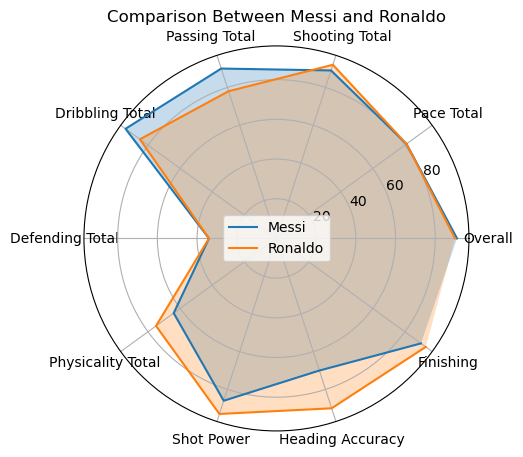

In [9]:
# Filtering rows for Messi and Ronaldo
messi = data[data['Full Name'] == 'Lionel Messi']
ronaldo = data[data['Full Name'] == 'C. Ronaldo dos Santos Aveiro']

# Defining the skill attributes for comparison
attributes = ['Overall','Pace Total','Shooting Total', 'Passing Total', 'Dribbling Total', 'Defending Total','Physicality Total','Shot Power' ,'Heading Accuracy', 'Finishing']

# Getting attribute values for Messi and Ronaldo
messi_values = messi[attributes].values[0]
ronaldo_values = ronaldo[attributes].values[0]

# Creating a radar chart
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(polar=True))
# Calculating angle for each attribute
angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
# Adding the attribute labels
ax.set_xticks(angles)
ax.set_xticklabels(attributes)

# Plotting Messi's skill values
ax.plot(angles, messi_values, label='Messi')
ax.fill(angles, messi_values, alpha=0.25)

# Plotting Ronaldo's skill values
ax.plot(angles, ronaldo_values, label='Ronaldo')
ax.fill(angles, ronaldo_values, alpha=0.25)

ax.legend()
plt.title('Comparison Between Messi and Ronaldo')
plt.show()

In [11]:
# Attributes and their corresponding weights
attributes = ['Overall', 'Pace Total', 'Shooting Total', 'Passing Total', 'Dribbling Total', 
              'Defending Total', 'Physicality Total', 'Shot Power', 'Heading Accuracy', 'Finishing', 
              'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression', 'Interceptions', 
              'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking']

weights = {
    'Overall': 0.15, 
    'Pace Total': 0.1, 
    'Shooting Total': 0.1, 
    'Passing Total': 0.1, 
    'Dribbling Total': 0.1,
    'Defending Total': 0.05, 
    'Physicality Total': 0.05, 
    'Shot Power': 0.05, 
    'Heading Accuracy': 0.05, 
    'Finishing': 0.05, 
    'Jumping': 0.05, 
    'Stamina': 0.05, 
    'Strength': 0.05, 
    'Long Shots': 0.05, 
    'Aggression': 0.05, 
    'Interceptions': 0.02, 
    'Positioning': 0.02, 
    'Vision': 0.02, 
    'Penalties': 0.02, 
    'Composure': 0.02, 
    'Marking': 0.02
}

# Filtering the rows for Lionel Messi and Cristiano Ronaldo
players = data[data['Full Name'].isin(['Lionel Messi', 'C. Ronaldo dos Santos Aveiro'])]

# Automating the process of calculating the weighted score
players['Total Score'] = sum(players[attr] * weights[attr] for attr in attributes)

# Displaying the result
players['Full Name'] = players['Full Name'].replace('C. Ronaldo dos Santos Aveiro', 'Cristiano Ronaldo')
print(players[['Full Name' , 'Total Score']].to_string(index=False))


        Full Name  Total Score
     Lionel Messi        91.66
Cristiano Ronaldo        94.58


## CR7 is the goat.